# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-08 15:41:19--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-08 15:41:19--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.03s   

2025-03-08 15:41:19 (2.54 MB/s) - ‘Eco

In [ ]:
# EJEMPLO de código:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?

_1R:_ Para retener a Nuevos Clientes, se podría implementar programas de lealtad con recompensas basadas en el gasto acumulado. Y para graduarlos, se podría dar ofertas especiales al cumplir un año de ser miembros de la comunidad.

2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

_2R:_ No necesariamente, ya que si el cliente se siente más comodo al usar la aplicación porque esta tiene funcionalidades diferentes al de la página web o por la facilidad de las tareas, no es algo malo o de lo qué alarmarse (igualmente, depende del proposito que la empresa le haya dado a la página web). Yo recomendaria hacer una investigación para comprender por qué los usuarios prefieren la aplicación y cómo utilizan ambas plataformas.

In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


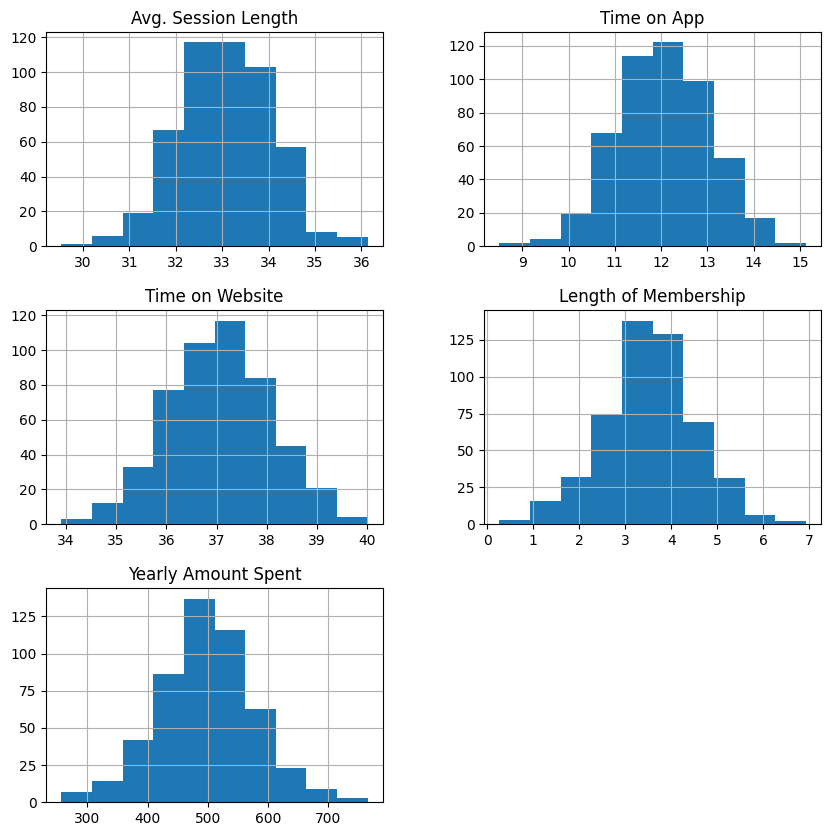

In [ ]:
histograms = df.hist(figsize=(10, 10))

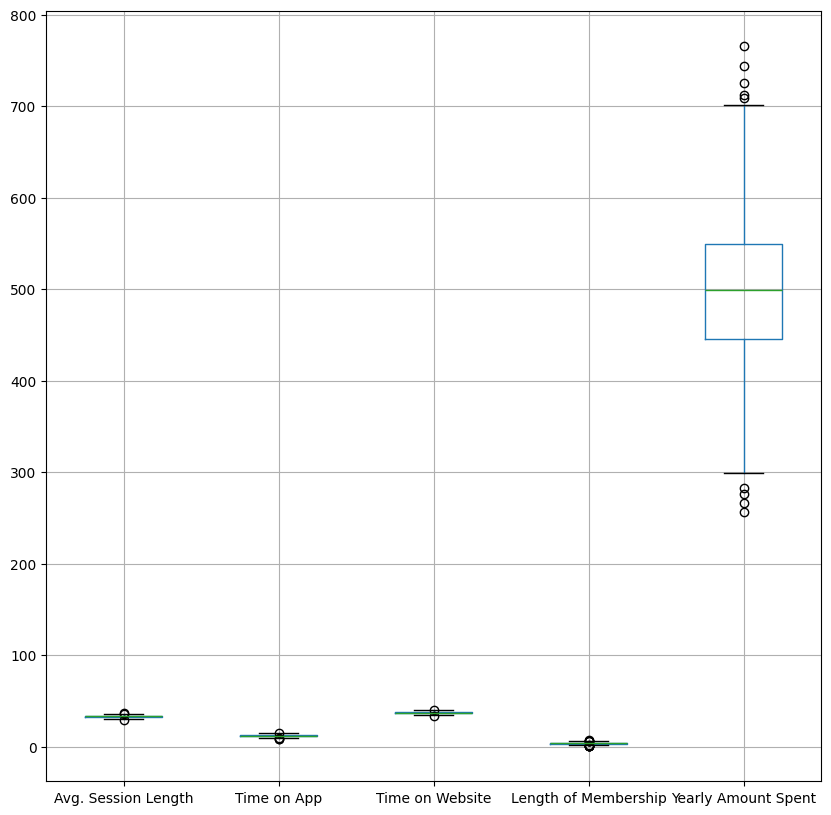

In [ ]:
boxplots = df.boxplot(figsize=(10, 10))

## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [ ]:
x=df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y=df['Yearly Amount Spent']

## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

_Respuesta:_ Se podría explicar con una analogía. Una empresa esta entrenando a un equipo de ventas. A estos se les da un manual von estrategias para luego ponerlos a practicar con clientes conocidos. Y para saber que relamente aprendieron a vender, y no simplemente se aprendideron todo de memoria, se pueden poner a prueba con clientes nuevos que nuncan hayan visto antes.
Es importante para predecir clientes futuros, ya que si el modelo opera de manera correcta en la prueba, se podría confiar en sus predicciones para tomar diferentes decisiones en la empresa.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                 x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42
                                              )

print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")

Entrenamiento: 400 muestras
Prueba: 100 muestras


## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
intercept = model.intercept_
coef = model.coef_

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef}")

Intercept (beta_0): -1044.26
Coeficiente (beta_1): [25.5962591  38.78534598  0.31038593 61.89682859]


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?

_1R:_ El R² fue de 0.97, lo que significa que las variables seleccionadas son bastante buenas para predecir el gasto anual de los clientes.
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

Un MAE de 15 USD significa que, en promedio, nuestras predicciones se desvían en 15 USD del gasto real. Para saber si se puede aceptar o no este margen de error dependera del contexto del negocio y del riesgo que este dispuesto a admitir.
_2R:_

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [ ]:
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train= mean_absolute_error(y_train, y_pred_train)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train}")
print(f"R^2: {r2_train}")
print(f"MAE: {mae_train}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test}")
print(f"R^2: {r2_test}")
print(f"MAE: {mae_test}")

Conjunto de Entrenamiento:
MSE: 95.82253022867249
R^2: 0.9854240629700333
MAE: 7.7270007310990705

Conjunto de Prueba:
MSE: 109.8637411839399
R^2: 0.9778130629184127
MAE: 8.558441885315231


In [ ]:
df["Yearly Amount Spent"].mean()

499.31403825859053

## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?

1R: Lo comunicaria de forma clara y con lenguage simple. Por ejemmplo, sabiendo que el coeficiente de "Time on App" (38.68) y "Length of membership" (61.87) son las variables más influyentes, les explicaria de esta forma: "Hemos identificado que la antiguedad de la membresia es la variable más importante que influye en cúanto gastan nuestros clientes. Esto nos indica que debemos priorizar las estrategias de fidelización para mantener a nuestros clientes satisfechos y fidelizados a largo plazo."
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

_2R:_ Basandome en los coeficientes más altos, que fueron "Time on App" y "Lenght of Membership", aplicaria las siguientes acciones:

- Asegurar que la aplicación sea facil de manejar.
- Implementar un sistema de puntos o recompensar por compras recurrentes para mantener la lealtad del cliente.
- Brindar un excelente de servicio al cliente al facilitar las compras y devoluciones.

Para aumentar los coeficientes de "Avg. Session Length" y "Time on Website", aplicaria las siguientes acciones:

- Mejorar el sitio web (busqueda eficiente, filtros de busqueda, etc.), de manera que sea facil navegar por ella.  
- Asegurar que la velocidad de carga del sitio web sea rápida para evitar que los usuarios se frusten y abandonen la página.
- Promocionar el uso de la página web para ver los productos en la plataforma.

## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?

_1R:_ El objetivo del informe es analizar los factores que influyen en el gasto anual de los clientes y proponer recomendaciones para aumentarlo. Los resultados se basan en un modelo de regresión lineal entrenado con datos de comportamiento de los clientes.

Las variables que explican mejor el gasto anual son las que mas influyeron en este:

- Length of Membership: Esta variable tiene el mayor impacto, indicando que los clientes con mayor antiguedad tienden a gastar más.
- Time on App: Esta variable indica el tiempo que los clientes pasan en la aplicación.

Si bien "Avg. Session Length" y "Time on Website" también contribuyen al modelo, su influencia es menor en comparación con las dos variables anteriores.

Para aumentar el Yearly Amount Spent, se recomienda mejorar la retención de clientes, implementar programas de fidelización con recompensas por antigüedad y gasto recurrente, optimizar la experiencia en la aplicación mediante mejoras en usabilidad y contenido personalizado, y mejorar la navegación y velocidad del sitio web. Además, es clave segmentar a los clientes para ofrecerles comunicaciones personalizadas y fomentar la interacción mediante foros, redes sociales o eventos que fortalezcan la comunidad en torno a la marca.
  
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

_2R:_ Existen factores externos que influyen en el gasto anual como la competencia, la situación económica de la empresa o las estrategias de marketing. Además, el modelo asume una relación lineal entre las variables predictoras y el gasto anual y es posible que la relación sea más compleja.


Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!